# UFCFVQ-15-M Programming for Data Science (Autumn 2022)
# Programming Task 2

## Student Id: 21071926

### Requirement FR7 - Read CSV data from two files and merge it into a single Data Frame 

In [59]:
#import modules
import pandas as pd

# Define the file names to read the data from
file1 = "task2a.csv"
file2 = "task2b.csv"

try :
        # Read two csv files using panda read_csv function
        df1 = pd.read_csv(file1)
        df2 = pd.read_csv(file2)
        # merge the data read from two csv into a single data frame
        mergedDf = pd.merge(df1, df2, on =["id_student"])
except FileNotFoundError:
        print('Files not found!!')


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR8 - Clean the merged data

In [5]:
# Cleaning the dataframe by removing rows with missing values
mod_df = mergedDf.dropna()

# Remove the unnecessary columns 'region' and 'highest_education', 'final_result'
cleaned_df = mod_df.drop(['region', 'highest_education', 'final_result'], axis=1)

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR9 - Filter out unnecessary rows

In [65]:
# make sure click_events column exist in df columns
if 'click_events' in cleaned_df.columns:
        # filter out the rows where click_events is smaller than 10
        output_df = cleaned_df[cleaned_df['click_events'] >= 10]
else:
    print("click_events column doesn't exist in given dataframe")

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Investigate the effects of engagement on attainment

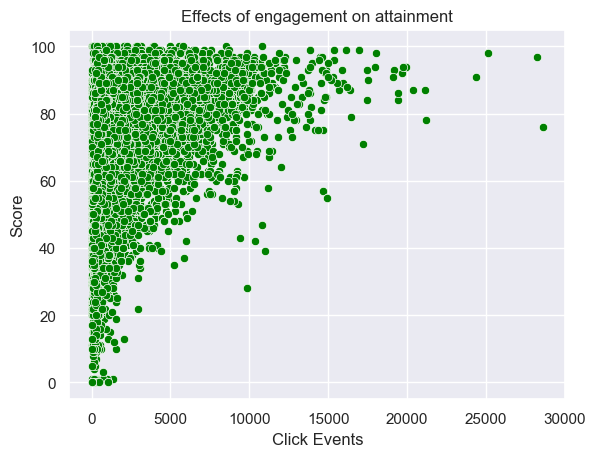

In [68]:
# import modules 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
sns.set_theme(style="darkgrid")

# In this particular example, I will use scatterplot() to visualize if there is any relation between the engagement (click_events) and level of engagement (scores). 
fig = sns.scatterplot(data=output_df, x="click_events", y="score", color="green").set(title='Effects of engagement on attainment')
plt.xlabel("Click Events")
plt.ylabel("Score")
plt.show(fig)


# In the below scatter-plot, The x-axis represents "Click Events", and the y-axis represents "Score". 
# If the data points make a straight line going from the origin out to high x- and y-values, then the variables are said to have a positive correlation . 
# If the line goes from a high-value on the y-axis down to a high-value on the x-axis, the variables have a negative correlation.
# Click Events can range from 0 to 30000, and score are from 0 to 100
# In general, we can see there there is a slightly statistically significant relationship between two variables.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Test the hypothesis that engagement has some effect on levels of attainment 

In [43]:
# Pearson correlation coefficient can be used to test if if there is any statistically significant relation between engagement and attainment.
# We can use pearsonr function from the scipy library to test if a linear relation exists between two scale variables.
# Generally, correlation represents, on average, how much two variables change relative to each other.
# Pearson correlation coefficient can be interpretted as follows:
    # There is a strong positive correlation is the value is 1. 
    # There is no correlation is the value is 0. 
    # There is a strong negative correlationis the value is -1.
# P-value represents the probability which observed correlation occured by chance. 
# If p-value is < 0.05, we can determine that two variables are statistically significant. 

corr, p_val = stats.pearsonr(output_df['click_events'], output_df['score'])
print(f'Pearson correlation coefficient r {corr:.3f} with p-value: {p_val:.3f}')

Pearson correlation coefficient r 0.274 with p-value: 0.000


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Investigate the effects of disability on levels of attainment 

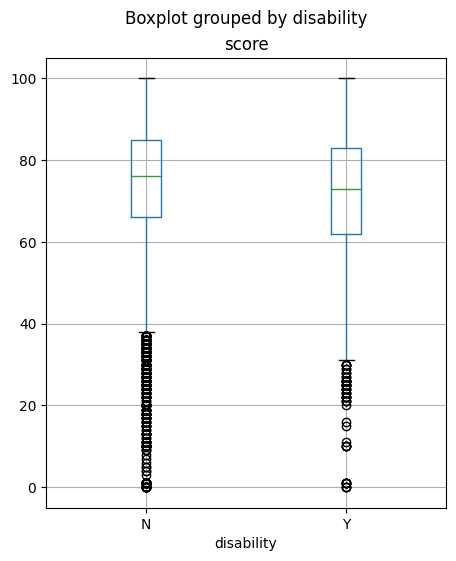

In [32]:
# "Boxplot" can be used to visualize the relationship between a continous variable and categorical variable. 
# In this scenario, what we are trying to understand is whether the disability has any affect on the level on attainment (score) 

output_df.boxplot(column='score', by='disability', figsize=(5,6))
plt.show()
# The below Box plot of disability vs score showing no correlation between the two variables
# If we observe the below box-plot, all the “boxes” are aligned, 
# Hence, disability and score are not correlated to each other, because having a disability does not affect the level of attainment (score).

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Test if there is any difference between the attainment of disabled and non-disabled students

In [66]:
# The p-value is the likelihood of finding a mean difference by chance if indeed there is no difference in population.
# If the p-value reported from t-test is < 0.05, the the result is said to be statistically significant.
# If the p-value reported from t-test is > 0.05, then the result is insignificant
# In this case, we are going to use Independent-Samples T Test as we are interested in comparing the "scroe" with the two unrelated  categories "disabled (Y)" and "non_disabled (N)" in the variable "disabled"
# As we can see that the p-value reported from t-test is 1.2444963362759264e-18, therefore there is no relationship between two variables (score and disability)

disabled = output_df.loc[output_df['disability'] == 'Y']['score'].to_numpy()
non_disabled = output_df.loc[output_df['disability'] == 'N']['score'].to_numpy()
# Test if there is a statistically significant difference between disabled and non-disabled students using SciPy
print (stats.ttest_ind(a = disabled, b = non_disabled, equal_var= True))

print(output_df)

Ttest_indResult(statistic=-8.817486923241981, pvalue=1.2444963362759264e-18)
       Unnamed: 0  id_student gender age_band disability  score  click_events
0               0       11391      M     55<=          N   82.0         934.0
1               1       28400      F    35-55          N   67.0        1435.0
2               2       31604      F    35-55          N   76.0        2158.0
3               3       32885      F     0-35          N   55.0        1034.0
4               4       38053      M    35-55          N   68.0        2445.0
...           ...         ...    ...      ...        ...    ...           ...
26716       26741     2620947      F     0-35          Y   89.0         476.0
26717       26742     2645731      F    35-55          N   89.0         893.0
26718       26743     2648187      F     0-35          Y   77.0         312.0
26719       26744     2679821      F    35-55          N   92.0         275.0
26720       26745     2684003      F    35-55          N   83.0  

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Task 2


# Task 2 - Process Development Report

Firstly, I have started this task by importing required libraries. Data from two csv files are read and merge into single dataframe using pandas. Then, I have performed the data cleaning (using dropna()) by dropping the rows with missing values and unnecessary columns (region, final_result and highest_education). Once we have the cleaned dataframe, we can filter the rows where the click_events > 10. In this case, I have used **"cleaned_df[cleaned_df['click_events'] >= 10]"**. However, alternatively we can use **"cleaned_df.query("click_events >= 10")"**.

In order to investigate the effects of engagement on levels of attainment, I have used seaborn scatterplot for visualization and to test if there is any relation between the engagement, pearsonr() from Statistical functions (scipy.stats). Alternatively, we could use **"numpy.corrcoef()"** to test if there is any relation between score and disability. We can conclude that two variables have statistically significant relationship if the p-value is < 0.05.

I have used seaborn "boxplot" to visualize the effects of engagement on attainment since it is to determine the relaationship between continuous and and a categorial variable. In boxplots, it displays the data distribution of the continuous variables for each category. It indicates no relation when the data distribution for each oategory is similar, that means the boxes are aligned. For this particular scenario, we can see that there is no effect of disability on the level of attainment. To prove it is not statistically significant, we can use ttest from SciPy. As we can see p-value reported from ttest is 1.2444963362759264e-18 where p-value > 0.05, which indicates there is no correlation between scores and disability.

However, the dataset given is only the single snapshot of data which migh not represent the entire student population. Analying data from multiple sources or including data from various sources would be more robust. Moreover, only few variables such click events or disability are considered in this analysis and there may be other factors that could affect the attainment levels(score).

To improve this approach, we could use more advanced statistical techniques such as regression analysis to determine which variables are the best predictors of score. For example, we could also consider data visualization for levels of attainment by gender. Additionally, we can use heatmaps to visualize relationships between multiple variables. In a more advanced level, we could use machine learning algorithm such as supervised machine learning or decision trees to predict the level of attainment based on available datasets. 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>